[5, 3, 1, 2]
[(5, 3), (3, 1), (1, 2)]


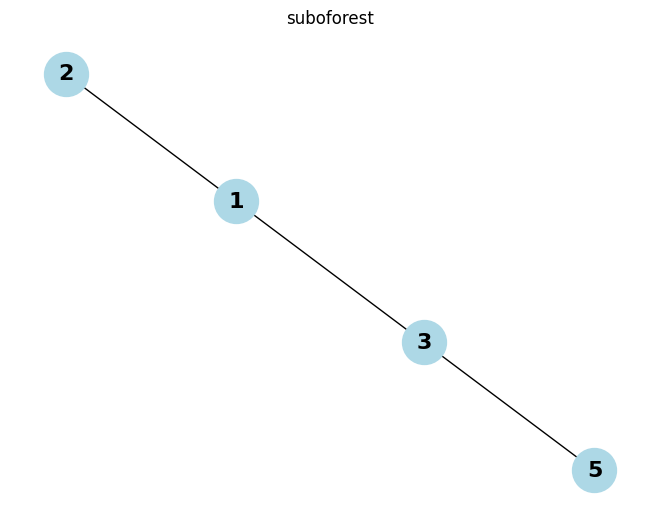

In [88]:
import networkx as nx
import matplotlib.pyplot as plt

def sadrzi_izomorfno(G, H):
    for h in H:
        gm = nx.algorithms.isomorphism.GraphMatcher(G, h)
        if gm.is_isomorphic():
            return True
    return False

def maximum_subforest(G, H):
    podstablo = nx.Graph()

    nodes_sorted = sorted(G.nodes(), key=lambda x: G.degree(x))
    i = 0
    for node in nodes_sorted:
        podstablo.add_node(node)
        
        
        for neighbor in G.neighbors(node):
            podstablo.add_edge(node, neighbor)
            
    

            if sadrzi_izomorfno(podstablo, H):
                podstablo.remove_edge(node, neighbor)
            
        if not nx.is_connected(podstablo):
            najveca_komp = max(nx.connected_components(podstablo), key=len)
            podstablo = podstablo.subgraph(najveca_komp).copy()
    
    
    return podstablo

G = nx.Graph()
G.add_edges_from([(1,2), (1,3), (2,4), (3,5), (3,6)])

H = []
h1 = nx.Graph()
h1.add_edges_from([(1,2), (1,3)])
H.append(h1)


h2 = nx.Graph()
h2.add_edges_from([(1,2)])
H.append(h2)

h3 = nx.Graph()
h3.add_edges_from([(1,2), (1,3), (2,4), (3,5), (3,6)])
H.append(h3)


h4 = nx.Graph()
h4.add_edges_from([(1,2), (1,3), (2,4), (3,5)])
H.append(h4)

h5 = nx.Graph()
h5.add_edges_from([(5, 3), (3, 1), (3, 6), (1, 2)])
H.append(h5)


subforest = maximum_subforest(G,H)

print(subforest.nodes)
print(subforest.edges)



nx.draw(subforest, with_labels=True, node_color = 'lightblue', node_size = 1000, font_size = 16, font_color = 'black', font_weight = 'bold')
plt.title("suboforest")
plt.show()


